In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import decimal
import random
import seaborn as sns
import math
sns.set()

alpha = .5438
beta = .12
# Matchup Function

def matchup(e1,e2,s1,s2,t1,t2):
    if e1 > e2:
        if s1 > s2:
            rating_week_after[t1] = e1 + 32/(1+10**((e1-e2)/400))
            rating_week_after[t2] = e2 - 32/(1+10**((e1-e2)/400))
        else:
            rating_week_after[t1] = e1 - 32/(1+10**((e2-e1)/400))
            rating_week_after[t2] = e2 + 32/(1+10**((e2-e1)/400))
    else:
        if s1 > s2:
            rating_week_after[t1] = e1 + 32/(1+10**((e1-e2)/400))
            rating_week_after[t2] = e2 - 32/(1+10**((e1-e2)/400))
        else:
            rating_week_after[t1] = e1 - 32/(1+10**((e2-e1)/400))
            rating_week_after[t2] = e2 + 32/(1+10**((e2-e1)/400))

def med_matchup(e1,e2,s1,s2,t1):
    if e1 > e2:
        if s1 > s2:
            rating_week_after[t1] = e1 + 32/(1+10**((e1-e2)/400))
        else:
            rating_week_after[t1] = e1 - 32/(1+10**((e2-e1)/400))
    else:
        if s1 > s2:
            rating_week_after[t1] = e1 + 32/(1+10**((e1-e2)/400))
        else:
            rating_week_after[t1] = e1 - 32/(1+10**((e2-e1)/400))
            
def winner(t1, t2, s1, s2):
    if s1 > s2:
        return t1
    else:
        return t2

def accuracy(winner, pred_winner):
    if winner == pred_winner:
        return 1
    else:
        return 0
    
def luck(s1,s2,w):
    if   s1 < s2 and w==1:
        return 1
    else:
        return 0

def unluck(s1,s2,w):
    if   s1 > s2 and w==0:
        return 1
    else:
        return 0

def prob(e1,e2):
    return 1/(10**((e2-e1)/400)+1)

def bin(p):
    for i in np.linspace(0,1,11):
        if i-.05 < p < i + .05:
            return i
    
# YEAR 1
leaguesize_s1 = 10

## Read Scores and Matchup csv
scores_s1 = pd.read_csv('scores_s1.csv')
scores_s1.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

matchups_s1 = pd.read_csv('matchups_s1.csv')
matchups_s1.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

## Ratings
### VS

initial = [1000]*leaguesize_s1

empty_ratings_s1 = matchups_s1[0:0]
empty_ratings_s1.insert(0, 0, pd.DataFrame(initial) , True)
vs_ratings_s1 = empty_ratings_s1
rating_week_after = [0]*leaguesize_s1

for k in range(1,17):
    for i in range(leaguesize_s1):
        for j in range(leaguesize_s1):
            if matchups_s1.at[i,k] == matchups_s1.at[j,k] and i != j:
                matchup(vs_ratings_s1.iloc[i,k-1], vs_ratings_s1.iloc[j,k-1], scores_s1.iloc[i,k-1], scores_s1.iloc[j,k-1], i, j)
                vs_ratings_s1[k] = rating_week_after


## Median

empty_ratings = matchups_s1[0:0]
empty_ratings.insert(0, 0, pd.DataFrame(initial) , True)
med_ratings_s1 = empty_ratings
rating_week_after = [0]*leaguesize_s1

for k in range(1,17):
    for i in range(leaguesize_s1):
            med_matchup(med_ratings_s1.iloc[i,k-1], 1000, scores_s1.iloc[i,k-1], scores_s1[k].median(), i)
            med_ratings_s1[k] = rating_week_after


## FFMR

FFMR_s1 = (med_ratings_s1*alpha) + (vs_ratings_s1*(1-alpha))


# YEAR 2

leaguesize_s2 = 12

## Read Scores and Matchup csv
scores_s2 = pd.read_csv('scores_s2.csv')
scores_s2.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

matchups_s2 = pd.read_csv('matchups_s2.csv')
matchups_s2.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

## Ratings

### VS

# Regress
x = vs_ratings_s1[16] - beta *(vs_ratings_s1[16] - vs_ratings_s1[16].mean())

empty_ratings_s2 = matchups_s2[0:0]
# Use append to add the two new league managers
empty_ratings_s2.insert(0, 0, x.append(pd.Series([1000,1000])) , True)
empty_ratings_s2.reset_index(drop=True)
empty_ratings_s2.index = range(len(empty_ratings_s2.index))
vs_ratings_s2 = empty_ratings_s2
rating_week_after = [0]*leaguesize_s2

for k in range(1,17):
    for i in range(leaguesize_s2):
        for j in range(leaguesize_s2):
            if matchups_s2.at[i,k] == matchups_s2.at[j,k] and i != j:
                matchup(vs_ratings_s2.iloc[i,k-1], vs_ratings_s2.iloc[j,k-1],scores_s2.iloc[i,k-1], scores_s2.iloc[j,k-1], i, j)
                vs_ratings_s2[k] = rating_week_after


### Median

x = med_ratings_s1[16] - beta *(med_ratings_s1[16] - med_ratings_s1[16].mean())

empty_ratings_s2 = matchups_s2[0:0]
empty_ratings_s2.insert(0, 0, x.append(pd.Series([1000,1000])) , True)
empty_ratings_s2.reset_index(drop=True)
empty_ratings_s2.index = range(len(empty_ratings_s2.index))
med_ratings_s2 = empty_ratings_s2
rating_week_after = [0]*leaguesize_s2

for k in range(1,17):
    for i in range(leaguesize_s2):
            med_matchup(med_ratings_s2.iloc[i,k-1], 1000, scores_s2.iloc[i,k-1], scores_s2[k].median(), i)
            med_ratings_s2[k] = rating_week_after


### FFMR

FFMR_s2 = (med_ratings_s2*alpha) + (vs_ratings_s2*(1-alpha))


# YEAR 3

leaguesize_s3 = 10

## Read Scores and Matchup csv
scores_s3 = pd.read_csv('scores_s3.csv')
scores_s3.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
matchups_s3 = pd.read_csv('matchups_s3.csv')
matchups_s3.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
### VS

vs_ratings_s2.index = range(len(vs_ratings_s2.index))
x = vs_ratings_s2[16] - beta *(vs_ratings_s2[16] - vs_ratings_s2[16].mean())
y = x.drop([9,10,11])

empty_ratings_s3 = matchups_s3[0:0]
empty_ratings_s3.insert(0, 0, y.append(pd.Series([1000])) , True)
vs_ratings_s3 = empty_ratings_s3
rating_week_after = [0]*leaguesize_s3

for k in range(1,17):
    for i in range(leaguesize_s3):
        for j in range(leaguesize_s3):
            if matchups_s3.at[i,k] == matchups_s3.at[j,k] and i != j:
                matchup(vs_ratings_s3.iloc[i,k-1], vs_ratings_s3.iloc[j,k-1], scores_s3.iloc[i,k-1], scores_s3.iloc[j,k-1], i, j)
                vs_ratings_s3[k] = rating_week_after


## Median

med_ratings_s2.index = range(len(med_ratings_s2.index))
x = med_ratings_s2[16] - beta *(med_ratings_s2[16] - med_ratings_s2[16].mean())
y = x.drop([9,10,11])

empty_ratings_s3 = matchups_s3[0:0]
empty_ratings_s3.insert(0, 0, y.append(pd.Series([1000])) , True)
med_ratings_s3 = empty_ratings_s3
rating_week_after = [0]*leaguesize_s3

for k in range(1,17):
    for i in range(leaguesize_s3):
            med_matchup(med_ratings_s3.iloc[i,k-1], 1000, scores_s3.iloc[i,k-1], scores_s3[k].median(), i)
            med_ratings_s3[k] = rating_week_after

## FFMR

FFMR_s3 = (med_ratings_s3*alpha) + (vs_ratings_s3*(1-alpha))


# YEAR 4

leaguesize_s4 = 10

## Read Scores and Matchup csv
scores_s4 = pd.read_csv('scores_s4.csv')
scores_s4.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
matchups_s4 = pd.read_csv('matchups_s4.csv')
matchups_s4.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
## Ratings

### VS

vs_ratings_s3.index = range(len(vs_ratings_s3.index))
x = vs_ratings_s3[16] - beta *(vs_ratings_s3[16] - vs_ratings_s3[16].mean())

empty_ratings_s4 = matchups_s4[0:0]
empty_ratings_s4.insert(0, 0, x, True)
vs_ratings_s4 = empty_ratings_s4
rating_week_after = [0]*leaguesize_s4

for k in range(1,18):
    for i in range(leaguesize_s4):
        for j in range(leaguesize_s4):
            if matchups_s4.at[i,k] == matchups_s4.at[j,k] and i != j:
                matchup(vs_ratings_s4.iloc[i,k-1], vs_ratings_s4.iloc[j,k-1], scores_s4.iloc[i,k-1], scores_s4.iloc[j,k-1], i, j)
                vs_ratings_s4[k] = rating_week_after


## Median

med_ratings_s3.index = range(len(med_ratings_s3.index))
x = med_ratings_s3[16] - beta *(med_ratings_s3[16] - med_ratings_s3[16].mean())

empty_ratings_s4 = matchups_s4[0:0]
empty_ratings_s4.insert(0, 0, x, True)
med_ratings_s4 = empty_ratings_s4
rating_week_after = [0]*leaguesize_s4

for k in range(1,18):
    for i in range(leaguesize_s4):
            med_matchup(med_ratings_s4.iloc[i,k-1], 1000, scores_s4.iloc[i,k-1], scores_s4[k].median(), i)
            med_ratings_s4[k] = rating_week_after


## FFMR

FFMR_s4 = (med_ratings_s4*alpha) + (vs_ratings_s4*(1-alpha))

# YEAR 5

leaguesize_s5 = 10

## Read Scores and Matchup csv
scores_s5 = pd.read_csv('scores_s5.csv')
scores_s5.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
matchups_s5 = pd.read_csv('matchups_s5.csv')
matchups_s5.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
## Ratings
### VS

vs_ratings_s4.index = range(len(vs_ratings_s4.index))
x = vs_ratings_s4[17] - beta *(vs_ratings_s4[17] - vs_ratings_s4[17].mean())

empty_ratings_s5 = matchups_s5[0:0]
empty_ratings_s5.insert(0, 0, x, True)
vs_ratings_s5 = empty_ratings_s5
rating_week_after = [0]*leaguesize_s5

for k in range(1,18):
    for i in range(leaguesize_s5):
        for j in range(leaguesize_s5):
            if matchups_s5.at[i,k] == matchups_s5.at[j,k] and i != j:
                matchup(vs_ratings_s5.iloc[i,k-1], vs_ratings_s5.iloc[j,k-1], scores_s5.iloc[i,k-1], scores_s5.iloc[j,k-1], i, j)
                vs_ratings_s5[k] = rating_week_after


## Median

med_ratings_s4.index = range(len(med_ratings_s4.index))
x = med_ratings_s4[17] - beta *(med_ratings_s4[17] - med_ratings_s4[17].mean())

empty_ratings_s5 = matchups_s5[0:0]
empty_ratings_s5.insert(0, 0, x, True)
med_ratings_s5 = empty_ratings_s5
rating_week_after = [0]*leaguesize_s5

for k in range(1,18):
    for i in range(leaguesize_s5):
            med_matchup(med_ratings_s5.iloc[i,k-1], 1000, scores_s5.iloc[i,k-1], scores_s5[k].median(), i)
            med_ratings_s5[k] = rating_week_after

## FFMR

FFMR_s5 = (med_ratings_s5*alpha) + (vs_ratings_s5*(1-alpha))


# Append FFMR

f1 = FFMR_s1.T
f2 = FFMR_s2.T
f3 = FFMR_s3.T
f4 = FFMR_s4.T
f5 = FFMR_s5.T
f1.columns = ['Justin', 'Nate', 'Derek','John','Nick','Sean','Pfeff','Shev','Eddie','Pete']
f2.columns = ['Justin', 'Nate', 'Derek','John','Nick','Sean','Pfeff','Shev','Eddie','Pete','Zach', 'James']
f3.columns = ['Justin', 'Nate', 'Derek','John','Nick','Sean','Pfeff','Shev','Eddie','Loof']
f4.columns = ['Justin', 'Nate', 'Derek','John','Nick','Sean','Pfeff','Shev','Eddie','Loof']
f5.columns = ['Justin', 'Nate', 'Derek','John','Nick','Sean','Pfeff','Shev','Eddie','Loof']

f_all = f1.append(f2).append(f3).append(f4).append(f5)
ffmr = f_all.reset_index()

##############################################################################
# Predictions and accuracy

m = pd.read_csv('matchupTimeline.csv')
s = pd.read_csv('Scores1_5.csv')


preds = pd.DataFrame(index=range(1),columns=range(12))
for w in range(1,86):
    for i in m.columns[1:]:
        for j in m.columns[1:]:
            if m.at[w,i] == m.at[w,j] and i!=j:
                preds.loc[len(preds.index)] = [w,i,s.at[w,i],ffmr.at[w,i],j ,s.at[w,j],ffmr.at[w,j], winner(i,j,s.at[w,i],s.at[w,j]), winner(i,j,ffmr.at[w,i],ffmr.at[w,j]), accuracy(winner(i,j,s.at[w,i],s.at[w,j]),winner(i,j,ffmr.at[w,i],ffmr.at[w,j])), s.at[w,'Week'], s.at[w,'Year']]

acc = preds.drop(0,axis=0)
acc.columns = ['Week (Total)', 'Team', 'Score', 'FFMR', 'Opponent', 'Opponent Score', 
             'Opponent FFMR', 'Winner', 'Predicted Winner','Result', 'Week (of season)', 'Year']

acc['Result'] = acc['Result'].astype(int)

for i in range(1,len(acc)+1):
    acc.at[i,'Win Prob'] = prob(acc.at[i,'FFMR'], acc.at[i,'Opponent FFMR'])
    acc.at[i,'Win Prob Bin'] = bin(acc.at[i,'Win Prob'])
    acc.at[i,'Win'] = accuracy(acc.at[i,'Team'],acc.at[i,'Winner'])
    
acc['Mean squared error'] = (acc['Win Prob']-acc['Win'])**2

<ipython-input-1-92fe8281f419>:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vs_ratings_s1[k] = rating_week_after
<ipython-input-1-92fe8281f419>:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_ratings_s1[k] = rating_week_after
<ipython-input-1-92fe8281f419>:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

# Binned Scatter Plot

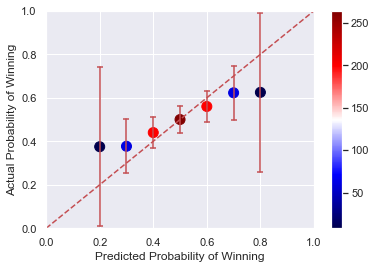

In [2]:
binplt = acc.groupby('Win Prob Bin').mean()['Win']
x = binplt.index
y = binplt
z = acc.groupby('Win Prob Bin').count()['Win']
ci = 2 * acc.groupby('Win Prob Bin').std()['Win'] / (acc.groupby('Win Prob Bin').count()['Win'])**.5

f,ax = plt.subplots()
points = ax.scatter(x,y, c=z, s=100, cmap='seismic')
plt.plot([0,1], '--r')

# 95% confidence interval
plt.scatter(x,y+ci,marker='_', c='r', s=30)
for i in binplt.index:
    plt.axvline(x = i, ymin = binplt[i]-ci[i], ymax =binplt[i]+ci[i], color = 'r')
plt.scatter(x,y-ci,marker='_', c='r', s=30)

plt.axis([0, 1, 0, 1])
plt.xlabel('Predicted Probability of Winning')
plt.ylabel('Actual Probability of Winning')

f.colorbar(points)
plt.show()

In [4]:
s5 = acc[acc['Year'] == 2022]

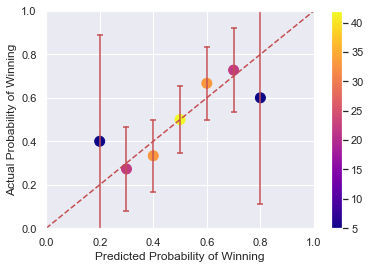

In [5]:
binplt = s5.groupby('Win Prob Bin').mean()['Win']
x = binplt.index
y = binplt
z = s5.groupby('Win Prob Bin').count()['Win']
ci = 2 * s5.groupby('Win Prob Bin').std()['Win'] / (s5.groupby('Win Prob Bin').count()['Win'])**.5

f,ax = plt.subplots()
points = ax.scatter(x,y, c=z, s=100, cmap='plasma')
plt.plot([0,1], '--r')

# 95% confidence interval
plt.scatter(x,y+ci,marker='_', c='r', s=30)
for i in binplt.index:
    plt.axvline(x = i, ymin = binplt[i]-ci[i], ymax =binplt[i]+ci[i], color = 'r')
plt.scatter(x,y-ci,marker='_', c='r', s=30)

plt.axis([0, 1, 0, 1])
plt.xlabel('Predicted Probability of Winning')
plt.ylabel('Actual Probability of Winning')

f.colorbar(points)
plt.show()

#  Brier Score

In [6]:
BS = acc['Mean squared error'].mean()

In [7]:
BS

0.24637498363678245

In [8]:
acc.groupby('Year').mean()['Mean squared error']

Year
2018    0.242376
2019    0.267385
2020    0.242943
2021    0.246605
2022    0.229008
Name: Mean squared error, dtype: float64

#  Brier Skill Score

In [9]:
bss = []
for j in range(100):
    randomlist = []
    for i in range(1,803):
        n = random.randint(0,1)
        randomlist.append(n)

    mse = (acc['Win Prob']-randomlist)**2

    bss.append(1- (acc['Mean squared error'].mean()/mse.mean()))

In [10]:
sum(bss)/len(bss)

0.06337997433839976

In [11]:
bss5 = []
for j in range(1000):
    randomlist = []
    for i in range(1,163):
        n = random.randint(0,1)
        randomlist.append(n)

    mse = (s5['Win Prob']-randomlist)**2

    bss5.append(1- (s5['Mean squared error'].mean()/mse.mean()))

In [12]:
sum(bss5)/len(bss5)

0.15218732983963631

# Extra

In [13]:
acc.sort_values('Mean squared error', ascending=False).iloc[0]

Week (Total)                   69
Team                         Sean
Score                      113.78
FFMR                   868.946214
Opponent                     John
Opponent Score             108.52
Opponent FFMR         1099.323164
Winner                       Sean
Predicted Winner             John
Result                          0
Week (of season)                1
Year                         2022
Win Prob                 0.209796
Win Prob Bin                  0.2
Win                           1.0
Mean squared error       0.624423
Name: 646, dtype: object